*Unit 4, Sprint 3, Module 2*

---

# Convolutional Neural Networks (Prepare)

> Convolutional networks are neural networks that use convolution in place of general matrix multiplication in at least one of their layers. *Goodfellow, et al.*

## Learning Objectives
- <a href="#p1">Part 1: </a>Describe convolution and pooling
- <a href="#p2">Part 2: </a>Apply a convolutional neural network to a classification task
- <a href="#p3">Part 3: </a>Use a pre-trained convolution neural network for image classification

Modern __computer vision__ approaches rely heavily on convolutions as both a `dimensionality reduction and feature extraction method`. Before we dive into convolutions, let's consider some of the common computer vision applications: 



* Classification [(Hot Dog or Not Dog)](https://www.youtube.com/watch?v=ACmydtFDTGs)
* Object Detection [(YOLO)](https://www.youtube.com/watch?v=MPU2HistivI)
* Pose Estimation [(PoseNet)](https://ai.googleblog.com/2019/08/on-device-real-time-hand-tracking-with.html)
* Facial Recognition [Emotion Detection](https://www.cbronline.com/wp-content/uploads/2018/05/Mona-lIsa-test-570x300.jpg)
* [Image segmentation](https://en.wikipedia.org/wiki/Image_segmentation)

We are going to focus on classification and pre-trained classification today. What are some of the applications of image classification?

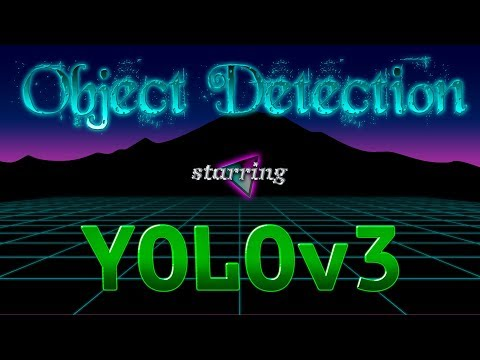

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('MPU2HistivI', width=600, height=400)

# 1. Convolution & Pooling (Learn)
<a id="p1"></a>

## Overview
Just like perceptrons and Fully Connected neural networks, CNNs are also inspired by biology - specifically, the receptive fields of the visual cortex.

[Hubel and Weisel Nobel Prize 1981](https://www.nobelprize.org/prizes/medicine/1981/summary/)<br>
In the brain, the neurons in the visual cortex **specialize** to be receptive to certain shapes, colors, orientations, and other common visual features. 

Our visual system transforms raw visual input (light from a scene), and sends it to neurons in the brain that evolved to specialize in responding to certain visual stimuli.

CNNs (Convolutional Neural Networks) were invented to imitate this approach. A convolution is a mathematical operation that involves passing a filter array with a small receptive field over an image and computing a feature map based on small patches of the image. and Convolutions have a [variety of nice mathematical properties](https://en.wikipedia.org/wiki/Convolution#Properties) - commutativity, associativity, distributivity, and more. Applying a convolution effectively transforms the "shape" of the input. 

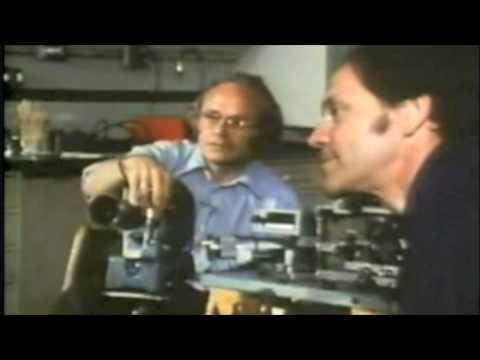

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('IOHayh06LJ4', width=600, height=400)

## Follow Along

What are the operations of Convolution and Pooling?

### Convolution

Consider blurring an image - assume the image is represented as a matrix of numbers, where each number corresponds to the color value of a pixel.

![](https://lambdaschool-data-science.s3.amazonaws.com/images/Unit4/Sprint2/Module2/Screen+Shot+2020-02-25+at+10.27.17+AM.png)

*Image Credits from __Hands on Machine Learning with Sckit-Learn, Keras & TensorFlow__*


Helpful Terms:
- __Filter__: The weights (parameters) we will apply to our input image.
- __Stride__: How the filter moves across the image
- __Padding__: Zeros (or other values) around the  the input image border (kind of like a frame of zeros). 

In [4]:
import imageio
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.exposure import rescale_intensity

austen = io.imread('https://dl.airtable.com/S1InFmIhQBypHBL0BICi_austen.jpg')
austen_grayscale = rescale_intensity(color.rgb2gray(austen))
austen_grayscale.shape

(400, 400)

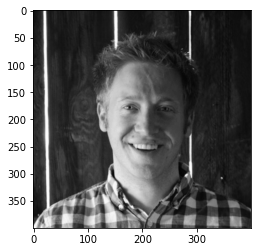

In [5]:
plt.imshow(austen_grayscale, cmap="gray");

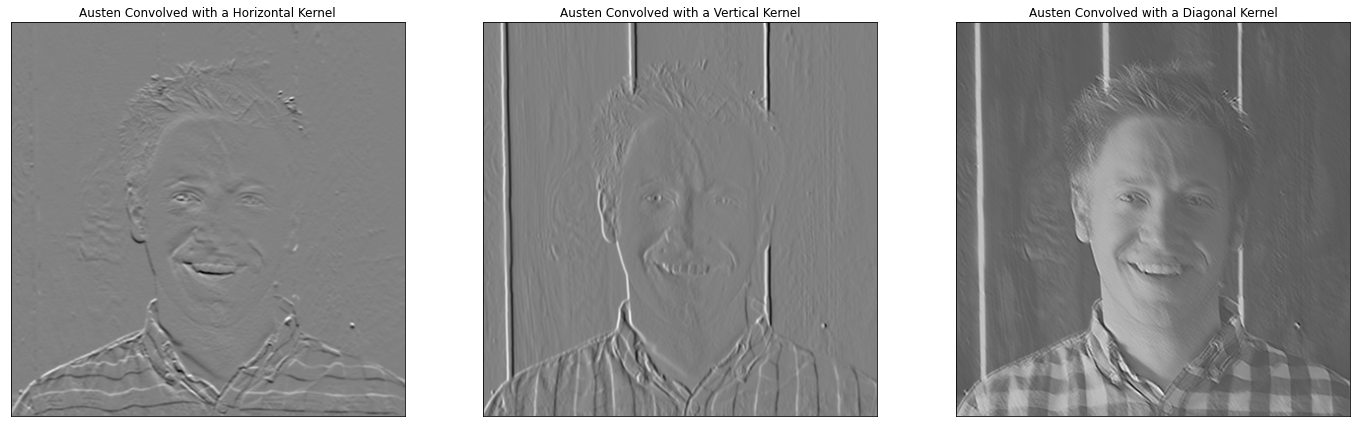

In [6]:
import numpy as np
import scipy.ndimage as nd

kernels=['Horizontal', 'Vertical', 'Diagonal']
horizontal = np.array([[1,1,1],
                       [0,0,0],
                       [-1,-1,-1]])

vertical = np.array([[1,0,-1],
                     [1,0,-1],
                     [1,0,-1]])

diagonal = np.array([[1,0,-1],
                     [0,1,0],
                     [-1,0,1]])

plt.figure(figsize=(24, 24))
for i, conv_kernel in enumerate([horizontal, vertical, diagonal]):
    plt.subplot(1, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    edges = nd.convolve(austen_grayscale, conv_kernel)
    plt.imshow(edges, cmap="gray");
    plt.title(f'Austen Convolved with a {kernels[i]} Kernel')

------

### Convolutional Neurons 

In [`scipy.ndimage.convolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html), a one-dimensional convolution calculation is given by<br><br>
$C_i = \sum_j{W_j X_{i+k-j} }$ <br>
where $C_i$ is the value of the convolution at the $ith$ position. <br>
A two-dimensional convolution can be expressed by a similar formula.

Don't worry about the various indices: focus on the general structure of the equation. 

If the sum doesn't look familar to you yet, we can recast it as a dot product:

$\mathbf{W} \cdot \mathbf{X}$<br>
where $W$ is a $n\times n$ convolution filter and $X$ is an  underlying $n\times n$ region of the image we are applying the convolution to. <br><br>
This matrix dot product is a scalar, which you recognize as the computation for a pixel value  in the activation map.<br><br>
If for example, $n=2$,  then the activation pixel value is the sum of the four terms<br><br>

$\mathbf{W} \cdot \mathbf{X} = W_{11} X_{11} + W_{12} X_{12}+ W_{22} X_{22} + W_{21} X_{21}$<br>

In a convolution, one can add a bias term...<br><br>

$\mathbf{W} \cdot \mathbf{X} + b$<br>

And optionally, an activation function...<br><br>

$\sigma(\mathbf{W} \cdot \mathbf{X} + b)$<br>

So the output would look like this:<br><br>

$y~=~\sigma(\mathbf{W} \cdot \mathbf{X} + b),$<br><br>
Where $y$ is the value of a pixel in the activation map

The convolutional layer is composed of neurons (perceptrons) that specialize in processing visual information.

Now `scipy.ndimage.convolve` doesn't use an activation function or a bias term, but the convolutional layers that we'll be using in our CNNs do have a bias term and (optionally) an activation function. 

Do you see how ubiquitous that perceptron equation is? This is why we took the time to learn it in Sprint 2.

_To recap: the perceptron is the fundamental building block of a neural network_

### Feature Maps 

![](https://www.researchgate.net/profile/Mehdi-Cherti/publication/326412238/figure/fig29/AS:648874402271233@1531715121461/Example-of-feature-hierarchy-learned-by-a-deep-learning-model-on-faces-from-Lee-et-al.png)


The matrix that is created by a convolution is a called **Feature Map**. 

Feature maps are matrices that contain the output of a convolutional layer. 

Each convolutional layer is performing both dimensionality reduction and feature engineering. 

In order to understand the above images, let's focus on the feature engineering part. 

**1st layer's job** is to detect lines/edges from the raw pixel values, then pass those lines (features that were created by the convolutional neurons) to the next layer. 

**2nd layer's job** is to accept the lines and combine them (like lego blocks) to create new features with them, this time parts of an object. Those parts are then passed forward to the next convolutional layer. 

**3rd layer's job** is to accept the parts of an object and put them together (like lego blocks) and create even more complex features, like a person's face, a car, a building, an animal, any object contained in the dataset. 


References: 

[Feature Visualization How neural networks build up their understanding of images](https://distill.pub/2017/feature-visualization/)

[Visualizing and Understanding Convolutional Networks, by
Matthew D Zeiler, Rob Fergus](https://arxiv.org/abs/1311.2901)

[A guide to convolution arithmetic for deep learning](https://arxiv.org/abs/1603.07285) From the abstract: "The guide clarifies the relationship between various properties (input shape, kernel shape, zero padding, strides and output shape) of convolutional, pooling and transposed convolutional layers, as well as the relationship between convolutional and transposed convolutional layers. Relationships are derived for various cases, and are illustrated in order to make them intuitive. "

------

### Pooling Layer

![](https://lambdaschool-data-science.s3.amazonaws.com/images/Unit4/Sprint2/Module2/Screen+Shot+2020-02-25+at+10.26.13+AM.png)

*Image Credits from __Hands on Machine Learning with Sckit-Learn, Keras & TensorFlow__*

We use Pooling Layers to reduce the dimensionality of the feature maps.<br>
We get smaller and smaller feature sets by repeatedly apply convolutions followed by pooling layers. 

Let's take a look at a simple example using Austen's photo.

(400, 400)

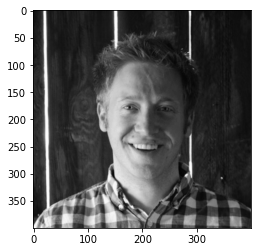

In [7]:
plt.imshow(austen_grayscale, cmap="gray");
austen_grayscale.shape

((200, 200), (400, 400))

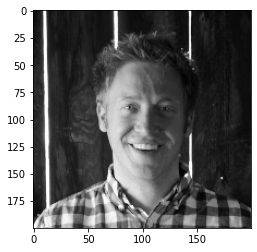

In [8]:
from skimage.measure import block_reduce

reduced1 = block_reduce(austen_grayscale, (2,2), np.max)
plt.imshow(reduced1, cmap="gray");
reduced1.shape, austen_grayscale.shape

With MaxPooling of (2,2) we are able to reduce the size of our image 
by a factor of 4 with out noticably losing any important information. <br>
We still preserve the light contrast and the lines, and much of the detail on Austen's face

(100, 100)

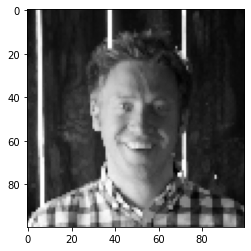

In [9]:
reduced2 = block_reduce(reduced1, (2,2), np.max)
plt.imshow(reduced2, cmap="gray");
reduced2.shape

(50, 50)

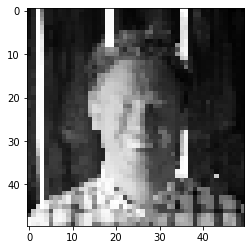

In [10]:
reduced3 = block_reduce(reduced2, (2,2), np.max)
plt.imshow(reduced3, cmap="gray");
reduced3.shape

(25, 25)

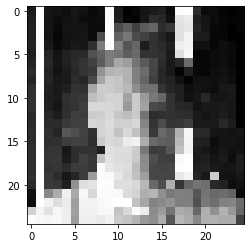

In [11]:
reduced4 = block_reduce(reduced3, (2,2), np.max)
plt.imshow(reduced4, cmap="gray");
reduced4.shape

(13, 13)

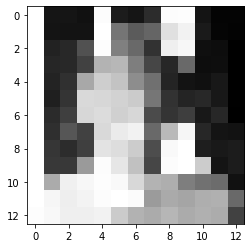

In [12]:
reduced5 = block_reduce(reduced4, (2,2), np.max)
plt.imshow(reduced5, cmap="gray");
reduced5.shape

The motivation behind the pooling layer is to reduce the number 
of trainable parameters by downsampling, <br>
while still preserving essential features of the image?

## Challenge

You will be expected to be able to describe convolution. 

---------

# 2. CNNs for Classification (Learn)

## Overview

### Typical CNN Architecture

![A Typical CNN](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/800px-Typical_cnn.png)

The first stage of a CNN is, unsurprisingly, a convolution - specifically, a transformation that maps regions of the input image to neurons responsible for receiving them. The convolutional layer can be visualized as follows:

![Convolutional layer](https://upload.wikimedia.org/wikipedia/commons/6/68/Conv_layer.png)

The red represents the original input image, and the blue the neurons that correspond.

As shown in the first image, a CNN can have multiple rounds of convolutions, [downsampling](https://en.wikipedia.org/wiki/Downsampling_(signal_processing)) (a digital signal processing technique that effectively reduces the information by passing through a filter), and then eventually a fully connected neural network and output layer. Typical output layers for a CNN would be oriented towards classification or detection problems - e.g. "does this picture contain a cat, a dog, or some other animal?"


#### A Convolution in Action

![Convolution](https://miro.medium.com/max/1170/1*Fw-ehcNBR9byHtho-Rxbtw.gif)



#### [Stanford CS231 Convolutions](https://cs231n.github.io/convolutional-networks/) has some great material, including an enlightening animation!

------
# Build a CNN
For this exercise we'll use the [CIFAR10 small images classification dataset](https://keras.io/api/datasets/cifar10/), available in Keras.<br>
CIFAR10 is a set of 50,000 training and 10,000 test images. <br>
The images are in 10 classes, as with our MNIST and Fashion MNIST data sets<br>
What's different is these are color images; each example is a tensor of shape 32x32x3 pixels.<br>
You can think of each example as composed of three 32x32 images, one each in Red, Green and Blue (RGB) filters.

Reference: [Interactive CIFAR model built in JavaScript](https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html) built by Andrej Karpathy.

In [13]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

### First let's load and explore the data

In [14]:
# load in our color images
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [15]:
# Normalize pixel values between 0 and 1
# this is done by dividing by the max pixel value 
train_images = train_images / 255.0
test_images = test_images / 255.0

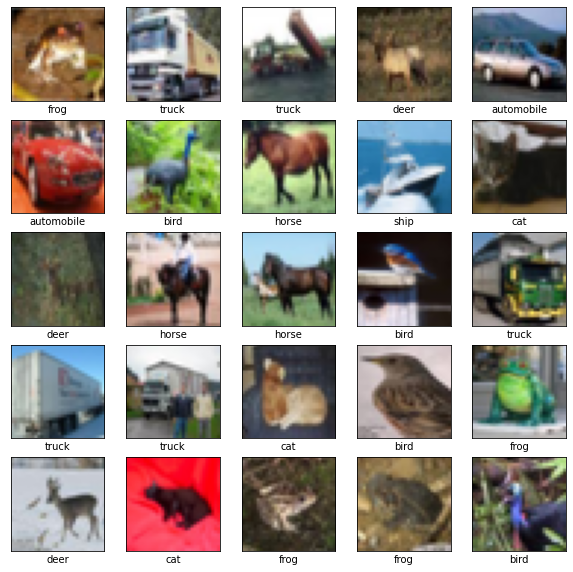

In [16]:
class_names = ['airplane', 
               'automobile', 
               'bird', 
               'cat', 
               'deer',
               'dog', 
               'frog', 
               'horse', 
               'ship', 
               'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Tensors

![](https://miro.medium.com/max/891/0*jGB1CGQ9HdeUwlgB)


In [17]:
# this is a Rank 3 tensor 
# another way of thinking about this array is that it is 3-dim
train_images[0].shape

(32, 32, 3)

In [18]:
# this is a Rank 4 tensor 
# another way of thinking about this array is that it is 4-dim
train_images.shape

(50000, 32, 32, 3)

_____

### Build a CNN Model to process CIFAR10 images, using Keras

In [19]:
# this is the number of labels that we want to predict in the output layer
n_features = len(np.unique(train_labels))
n_features

10

In [20]:
###BEGIN SOLUTION
# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=train_images[0].shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
###END SOLUTION

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [21]:
32*32*3

3072

In [22]:
model.fit(train_images, train_labels, 
          epochs=10, 
          validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4537 - accuracy: 0.4778 - val_loss: 1.1905 - val_accuracy: 0.5723
Epoch 2/5
1563/1563 [==============================] - 35s 22ms/step - loss: 1.1014 - accuracy: 0.6144 - val_loss: 1.0519 - val_accuracy: 0.6359
Epoch 3/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9851 - accuracy: 0.6559 - val_loss: 1.0060 - val_accuracy: 0.6507
Epoch 4/5
1563/1563 [==============================] - 34s 21ms/step - loss: 0.9093 - accuracy: 0.6829 - val_loss: 0.9901 - val_accuracy: 0.6554
Epoch 5/5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8548 - accuracy: 0.7015 - val_loss: 0.9148 - val_accuracy: 0.6801


### Questions about the CNN we just built

Q1: Can you explain the Output Shape of each of these layers?<br>
* `conv2d_9`
* `max_pooling2d_6`
* `conv2d_10`
* `max_pooling2d_7`
* `conv2d_11` 
* `flatten_3` 

Q2: Can you explain the number of parameters in each layer?<br>
Hint: for `conv2d_9` there are $32$ $(3\times3)$ convolution filters for each of the $3$ (RGB) input images. You can think of these convolution filters as a stack of $3\times3\times3$ tensors, each of which is applied to the $32\times32\times3$ input image. There are a total of $32\times3\times3\times3$ = $864$ weights. And each of these $3\times3\times3$ convolution filters also has an associated bias, so there are a total of $864 + 32 = 896$ parameters.

Q3: How could you make the activation map produced by each convolution the same size as its input, instead of $2$ pixels smaller in each dimension? Try it. Does this improve the model's performance?

Q4: Why does the last `Dense` layer have 10 neurons?

Q5: Why does the last `Dense` layer have a different activation function than the previous `Dense` layer?

In [23]:
# import Adam in format that allows tuning the learning rate
from tensorflow.keras.optimizers import Adam
# specify learning rate and optimizer
opt = Adam(learning_rate=0.001)

In [24]:
# Compile Model
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
%%time
# Fit Model
model.fit(train_images, 
          train_labels, 
          epochs=10, batch_size=128,
          validation_data=(test_images, test_labels)
          )

Epoch 1/5
391/391 [==============================] - 28s 71ms/step - loss: 0.7528 - accuracy: 0.7360 - val_loss: 0.9049 - val_accuracy: 0.6843
Epoch 2/5
391/391 [==============================] - 27s 68ms/step - loss: 0.7196 - accuracy: 0.7501 - val_loss: 0.8745 - val_accuracy: 0.6962
Epoch 3/5
391/391 [==============================] - 28s 71ms/step - loss: 0.6927 - accuracy: 0.7589 - val_loss: 0.8914 - val_accuracy: 0.6939
Epoch 4/5
391/391 [==============================] - 27s 70ms/step - loss: 0.6723 - accuracy: 0.7655 - val_loss: 0.8903 - val_accuracy: 0.6944
Epoch 5/5
391/391 [==============================] - 28s 70ms/step - loss: 0.6488 - accuracy: 0.7733 - val_loss: 0.8789 - val_accuracy: 0.7031
CPU times: total: 7min 41s
Wall time: 2min 17s


In [26]:
# Evaluate Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - loss: 0.8789 - accuracy: 0.7031 - 2s/epoch - 6ms/step


## For reference, how would this CNN perform on MNIST or Fashion-MNIST?

In [27]:
from tensorflow.keras.datasets import mnist

# Load the Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize from 0-1
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Reshaping the array to 4-dims so that it can work with the Tensorflow.Keras API
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Setup Architecture
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print summary
model.fit(X_train, y_train, 
          epochs=10, 
          validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1479 - accuracy: 0.9561 - val_loss: 0.0569 - val_accuracy: 0.9806
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0461 - accuracy: 0.9853 - val_loss: 0.0300 - val_accuracy: 0.9901
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0316 - accuracy: 0.9899 - val_loss: 0.0338 - val_accuracy: 0.9886
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0295 - val_accuracy: 0.9903
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0188 - accuracy: 0.9941 - val_loss: 0.0283 - val_accuracy: 0.9900


In [28]:
from tensorflow.keras.datasets import fashion_mnist

# Load the Data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize from 0-1
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Reshaping the array to 4-dims so that it can work with the Tensorflow.Keras API
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Setup Architecture
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print summary
model.fit(X_train, y_train, 
          epochs=10, 
          validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4836 - accuracy: 0.8238 - val_loss: 0.3658 - val_accuracy: 0.8674
Epoch 2/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3242 - accuracy: 0.8824 - val_loss: 0.3162 - val_accuracy: 0.8891
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2762 - accuracy: 0.9000 - val_loss: 0.2947 - val_accuracy: 0.8964
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2437 - accuracy: 0.9104 - val_loss: 0.2699 - val_accuracy: 0.9057
Epoch 5/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2200 - accuracy: 0.9199 - val_loss: 0.2776 - val_accuracy: 0.8982


## Challenge

You will apply CNNs to a classification task in the module project.

-------
### Digression

We do have the option of taking a look at the weight values (from the convolutional layers and FCFF layers). The input data (the images) are normalized to values between 0 and 1. Our lesson on Gradient Descent (from Sprint 2) taught us that normalized data should have 2 observable effects: 

- The weight values should all be about the same size (i.e. on the same order of magnitude). 
- The model performance should be better when using normlized data than on non-normalized data set. 

A fun experiment you should consider running at some other time would be to see if these observations are reversed and to what extent if the input data is not normalized. 

In [29]:
# model has a bunch of cool attributes that you can explore
# one such attribute is the tuned weights between each layer 
weights = model.get_weights()

# these are the trained/learned weights of our model when we NORMALIZE our input data
# Experiment: what would the weight values be if we DIDN'T NORMALIZE our imput data???????????
for w_mat in weights:
    print (w_mat.min(), w_mat.max())

-1.5213349 0.34932882
-0.054282624 0.14349729
-0.7749683 0.5838723
-0.15264723 0.34536576
-0.6467603 0.5320768
-0.14072818 0.18807575
-1.209673 0.60333997
-0.23689744 0.11514453


-------

# 3. Transfer Learning for Image Classification (Learn)

## Overview

### Transfer Learning Repositories

#### [TensorFlow Hub](https://www.tensorflow.org/hub/) 
is a library for reusable machine learning models, that lets you quickly take advantage of models that were trained with thousands of GPU hours. 

This makes possible [**transfer learning**](https://keras.io/guides/transfer_learning/) - reusing a trained model's weights and biases as your model's initial values, then continuing to train the model with your own data to arrive at the best values for your task. The advantages are fairly clear - you can use less training data, have faster training, and have a model that generalizes better. It works because a model that is trained well on a large number of images has already learned the basic components common to these images. So if the images in your own data set are not too different than the ones in the original large training data, the parametes from the trained model will work reasonably well on your images "right out of the box". Adopting the trained weights and biases as your intial values, then continuing to train the model can often significantly improve the performance. Note that transfer learning requires that your model architecture is identical to that of the original trained model!



TensorFlow Hub is very bleeding edge, and while there's a good amount of documentation out there, it's not always updated or consistent. You'll have to use your problem-solving skills if you want to use it!

#### Keras API - Applications

> Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

There is a decent selection of important benchmark models. 

We'll focus on a workhorse image classifier: **ResNet50.**

Here's a link that lists all the pre-trained models in the [**Keras Library**](https://keras.io/api/applications/)

The ImageNet competition started in 2010 and has a labeled dataset consisting of 1.2 million images, each a member of one of 1000 classes. This competition has played a key role in spurring theoretical advances in Computer Vision. [**paperswithcode**](https://paperswithcode.com/) has an interesting webpage [**Image Classification on ImageNet**](https://paperswithcode.com/sota/image-classification-on-imagenet) that keeps track of the evolution of the best-performing image classification architectures over the last 10 years or so. <br>


Note the recent trend that [**Transformer**](https://jalammar.github.io/illustrated-transformer/)-based architectures -- which were developed for use in  Natural Language Processing -- are now performing as well as state of the art CNNs on Computer Vision problems! If you are interested in learning about Transformers, see the [**Hugging Face Transformers Course**](https://huggingface.co/course/chapter1).

## Using a pre-trained model for image classification (Follow Along)
We are going to classify images using a pretrained `ResNet50` model right "out of the box".

In [30]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [31]:
def process_img_path(img_path):
    """
    Using tensorflow per-build image processor. 

    Returns processed image. 
    """
    # docs: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img
    return image.load_img(img_path, target_size=(224, 224))

# Decide whether any of the three most likely image classes is "banana"
def img_contains_banana(img):
    """
    Imputs image into resnet50 pre-trained model and returns the top 3 likely labels for the image (ranked by largest probability)
    """
    # preprocess image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    print('x.shape after preprocess_input ',x.shape)
    
    # instantiate pretrained ResNet50 model
    model = ResNet50(weights='imagenet')
    
    # get classification of image
    features = model.predict(x)
    
    # docs: https://www.tensorflow.org/api_docs/python/tf/keras/applications/imagenet_utils/decode_predictions
    results = decode_predictions(features, top=3)[0]
 
    # return True if 'banana' is among the top 3 predictions
    detected_banana = False
    for entry in results:
        print(entry)
        if entry[1] == 'banana':
            detected_banana = True
    return detected_banana

### Let's have a look at the ResNet50 model architecture
We imported the ResNet50 model, including the $25,583,592$ parameters (weights and biases) that were trained using the ImageNet data set!

In [32]:
model = ResNet50(weights='imagenet')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

Now let's use our `ResNet50` model to classify a few images and see whether it thinks they are a banana. <br>
Our `img_contains_banana` function returns `True` if any of the top 3 predicted classes is `banana`.

In [33]:
import requests

# links to two images that we'll use with our pre-trained model
image_urls = ["https://github.com/LambdaSchool/ML-YouOnlyLookOnce/raw/master/sample_data/negative_examples/example11.jpeg",
              "https://github.com/LambdaSchool/ML-YouOnlyLookOnce/raw/master/sample_data/positive_examples/example0.jpeg"]

for _id,img in enumerate(image_urls): 
    r = requests.get(img)
    with open(f'example{_id}.jpg', 'wb') as f:
        f.write(r.content)

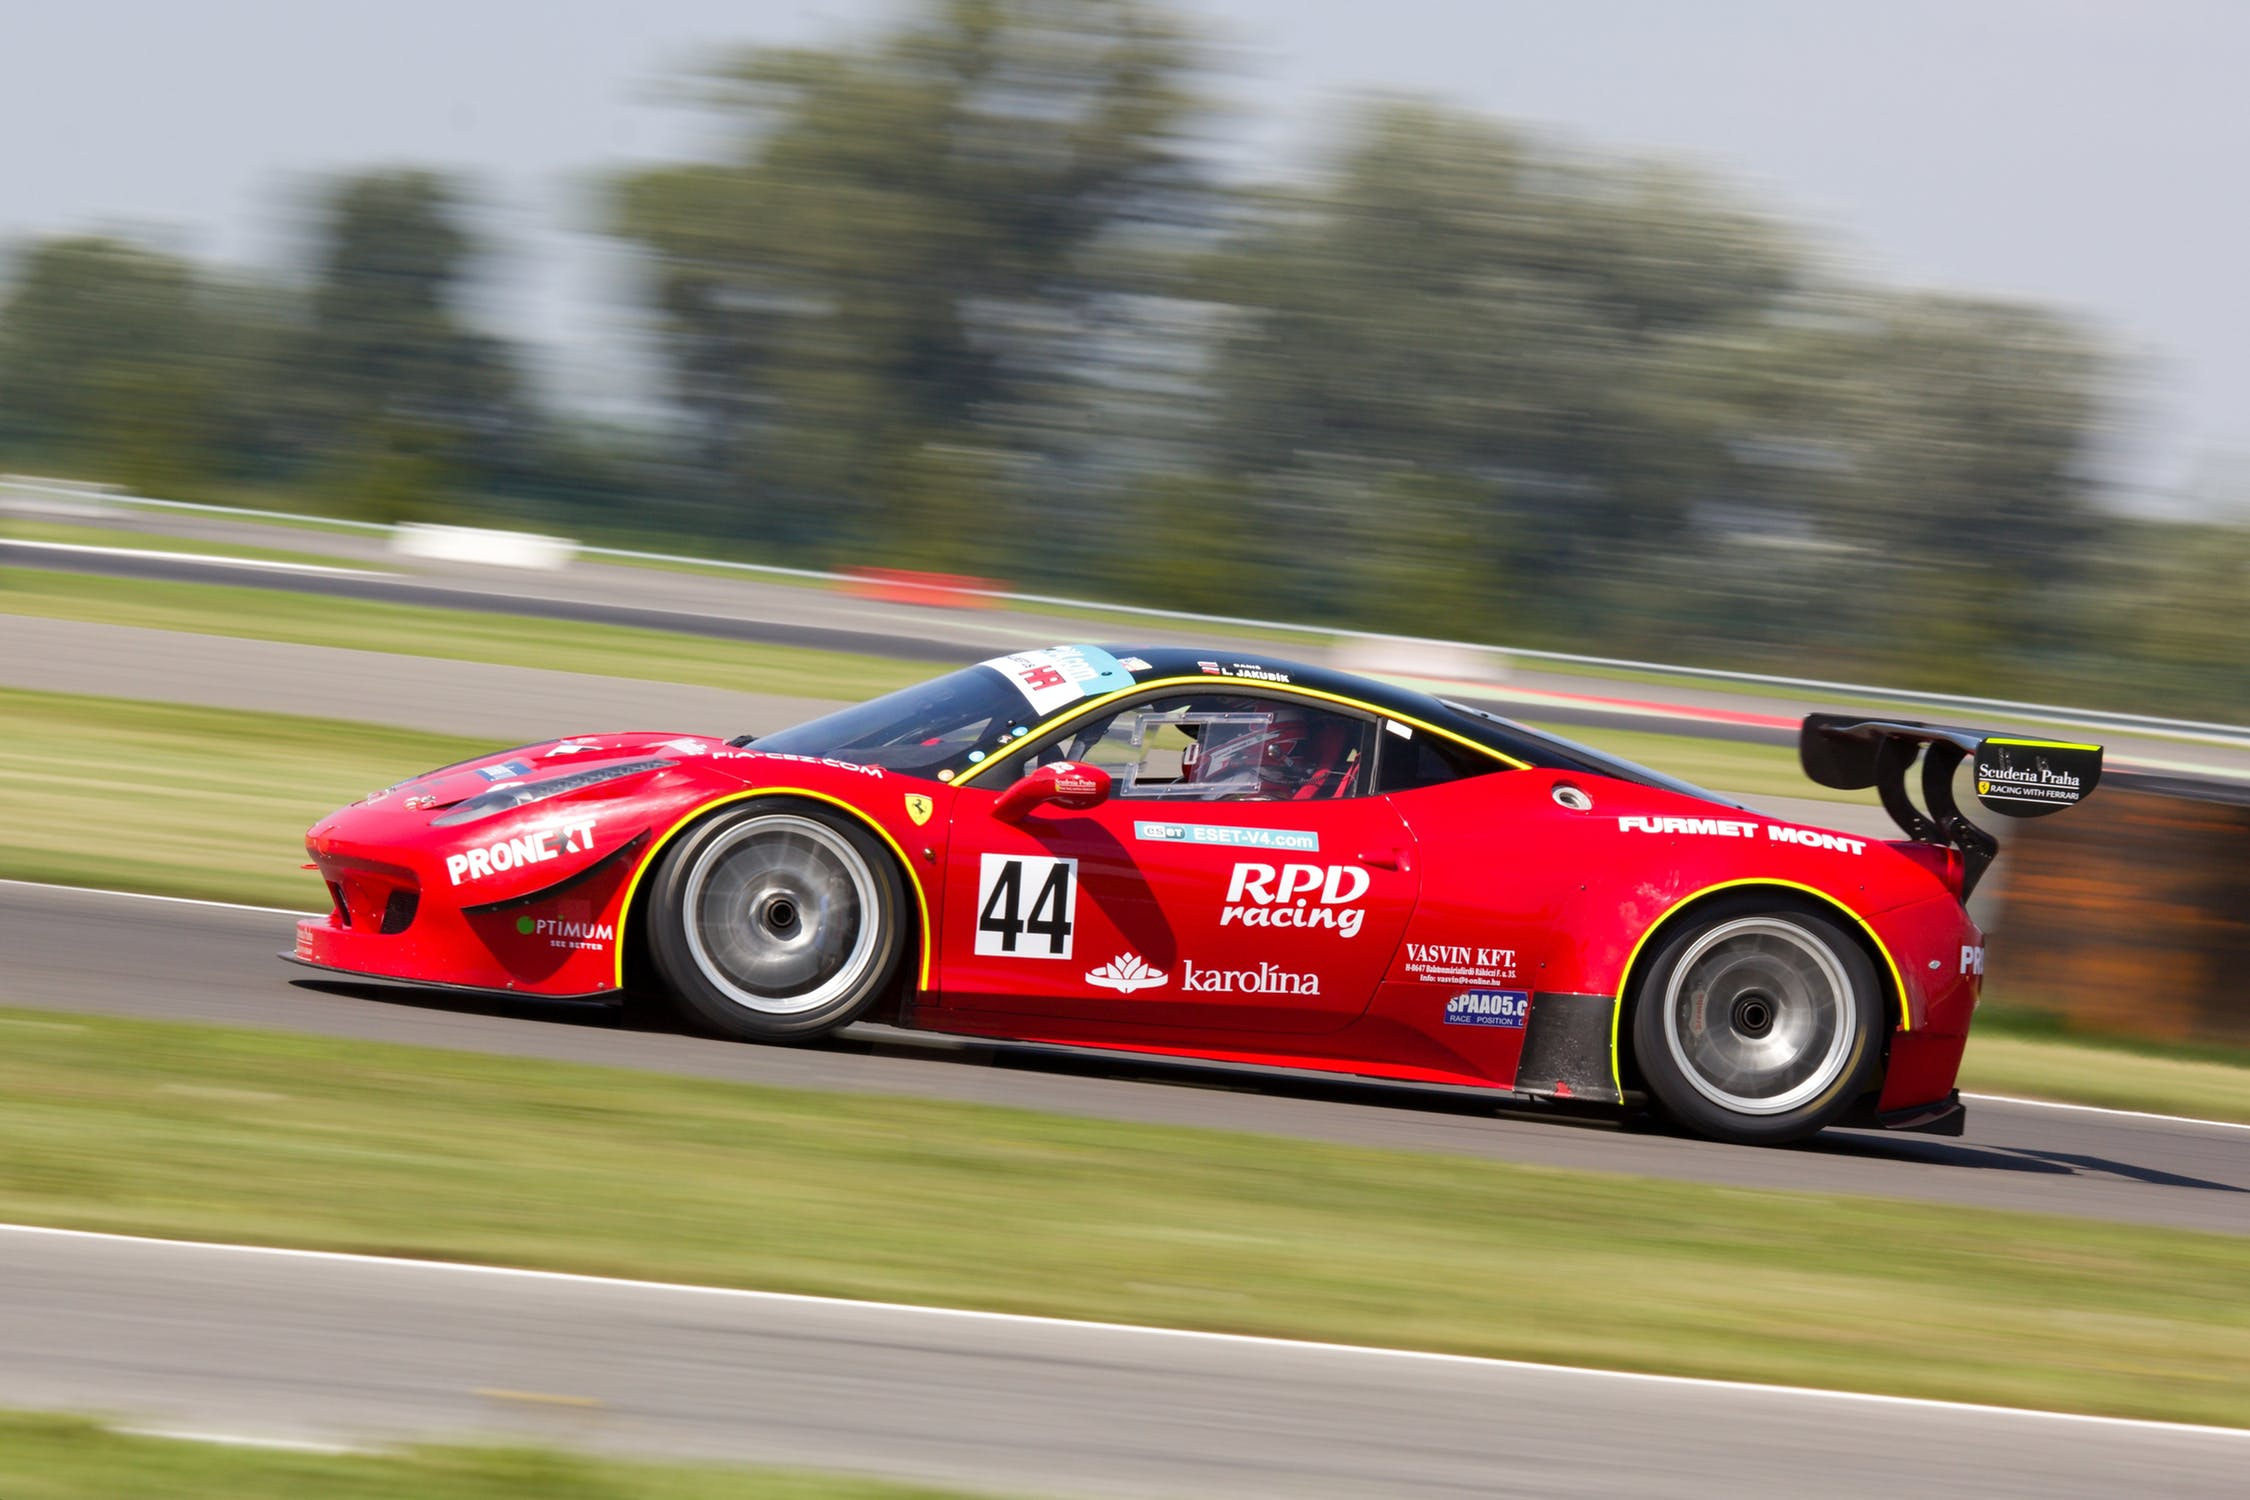

In [34]:
from IPython.display import Image
Image(filename='./example0.jpg', width=600)

In [35]:
processed_image = process_img_path('example0.jpg')
img_contains_banana(processed_image)

x.shape after preprocess_input  (1, 224, 224, 3)
('n04037443', 'racer', 0.9256286)
('n04285008', 'sports_car', 0.07028751)
('n04461696', 'tow_truck', 0.0021220415)


False

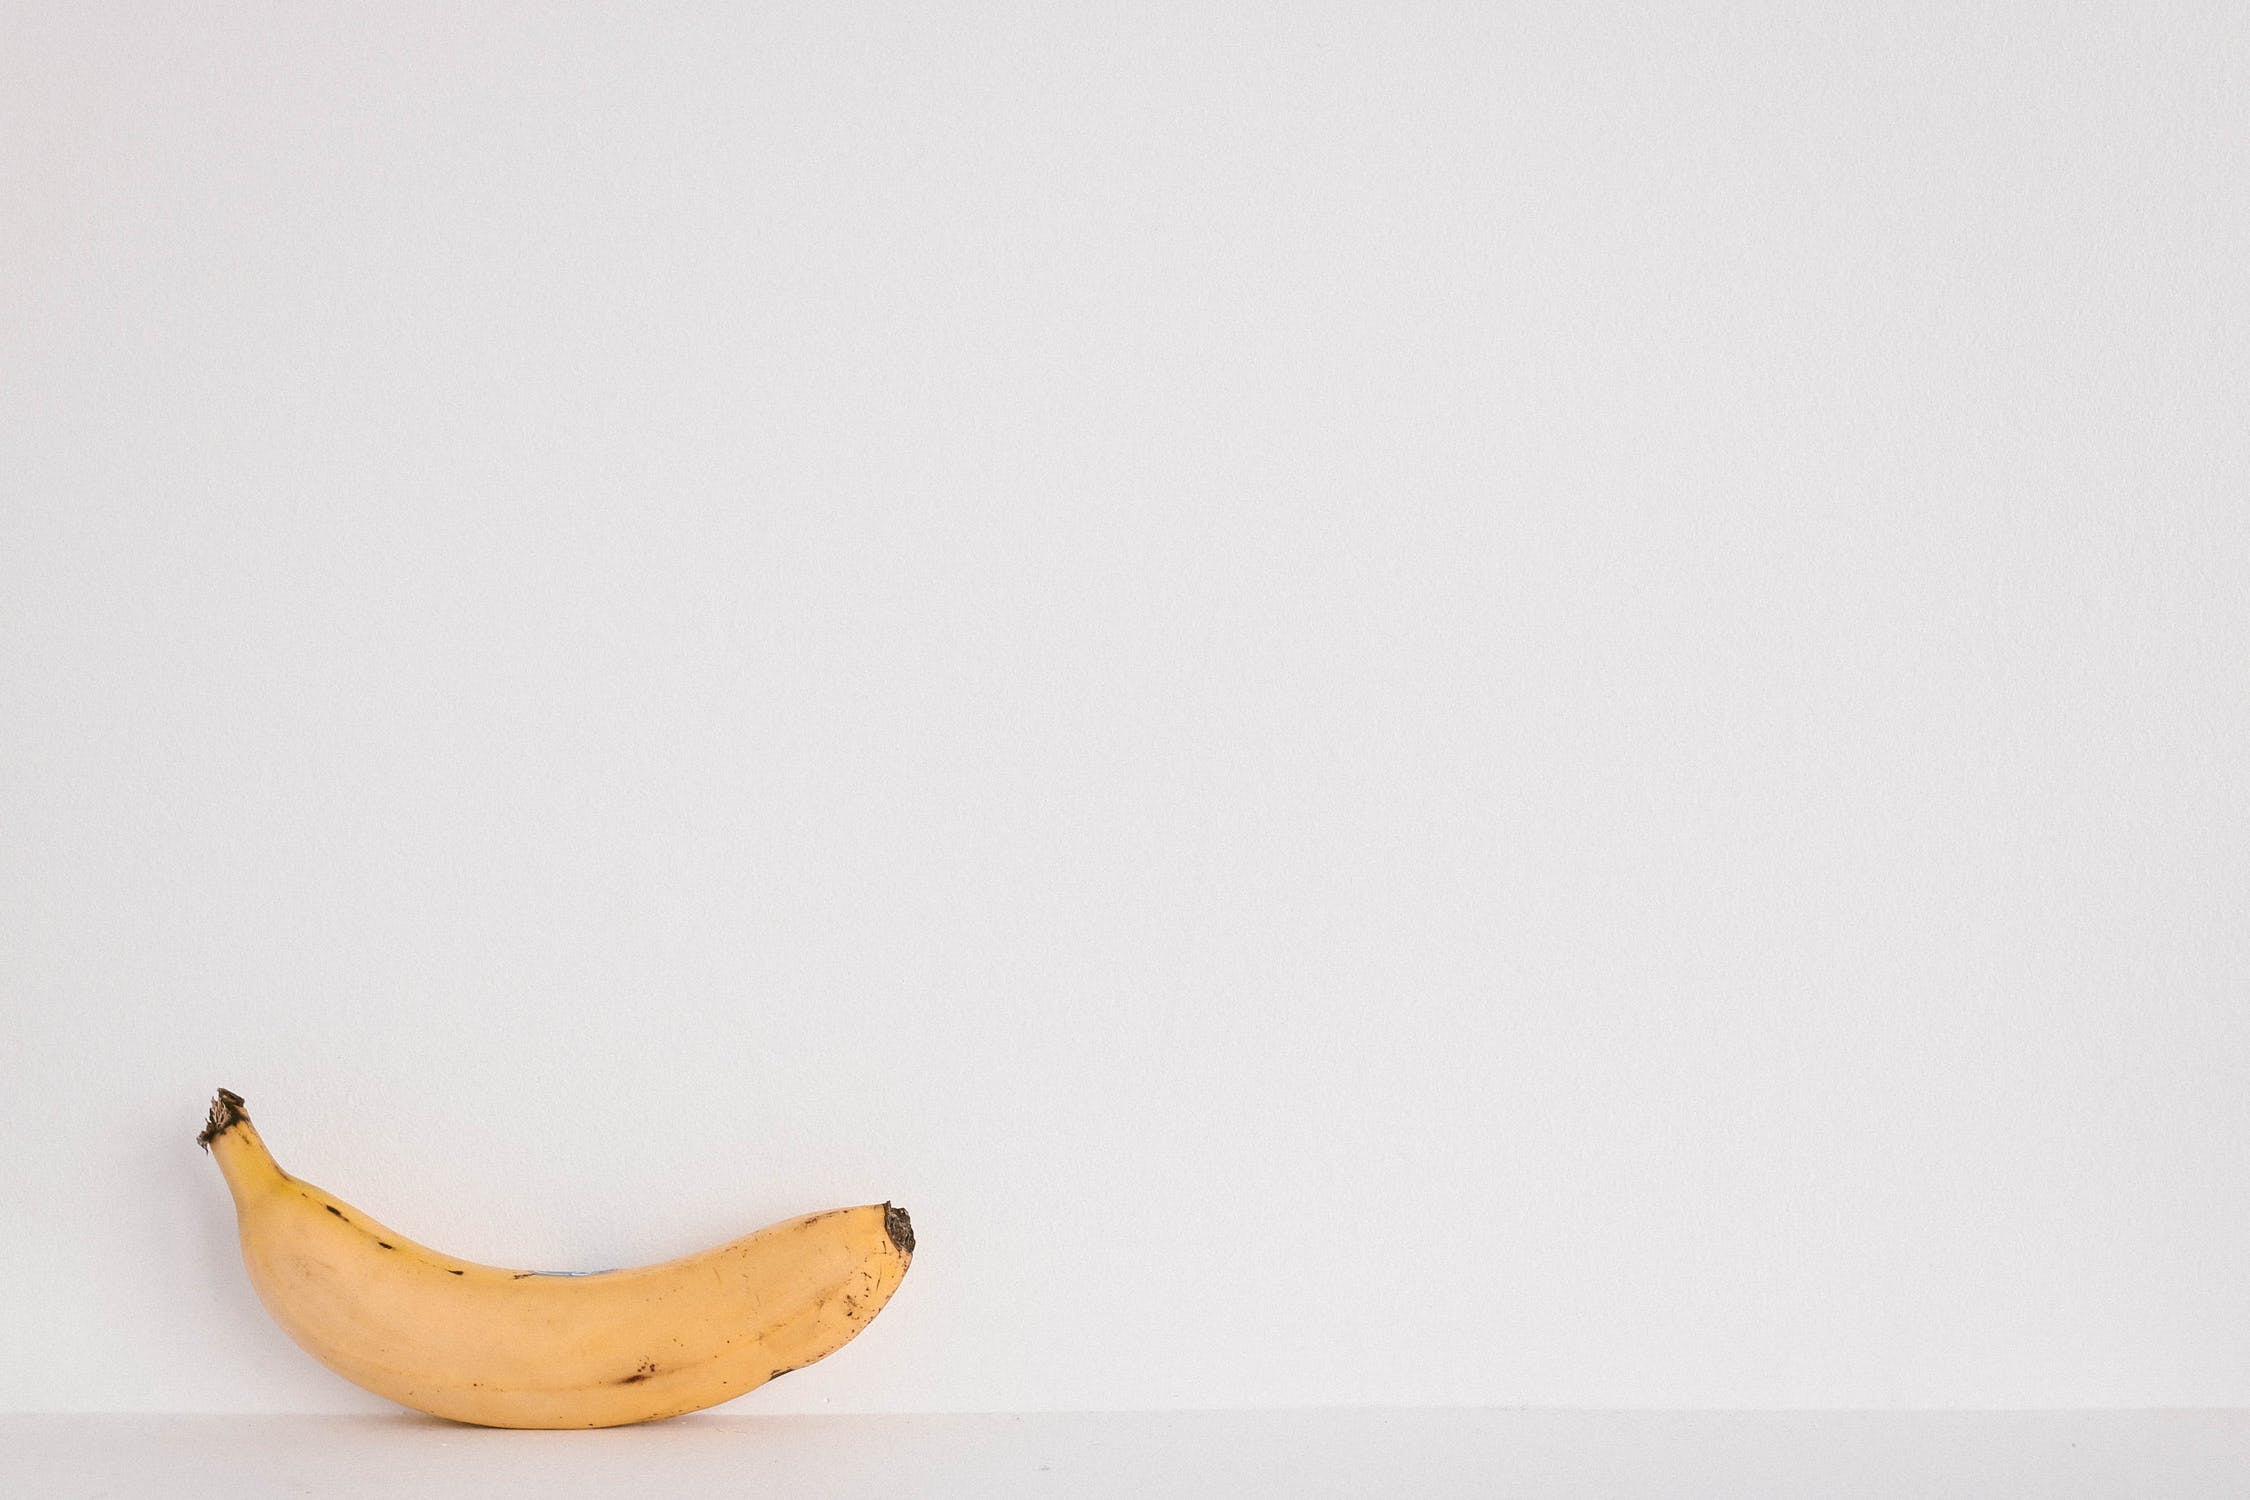

In [36]:
Image(filename='example1.jpg', width=600)

In [37]:
img_contains_banana(process_img_path('example1.jpg'))

x.shape after preprocess_input  (1, 224, 224, 3)
('n03532672', 'hook', 0.07773932)
('n07753592', 'banana', 0.070150524)
('n03498962', 'hatchet', 0.06332071)


True

In [38]:
# Image(filename='example1_cropped.jpg', width=600)

In [39]:
# img_contains_banana(process_img_path('example1_cropped.jpg'))

Notice that, while it gets it right, the confidence for the `banana` classification is only $7\%$, lower than the confidence for `hook`! <br>
That's likely because so much of the image is "not-banana", i.e. white pixels! How can this be improved? <br>
A *bounding box* could be centered on objects of interest, and we could then classify only the contents of the box rather than the entire image.

## Challenge

You will be expected to apply a pretrained model to a classification problem today. 

# (BONUS) Hot Dog vs. Not Hot Dog

<img src="https://blog.paperspace.com/content/images/size/w2000/2018/04/maxresdefault.jpg" style="width: 600px;">

In this next section, we will try to build our own Image Classification model to detect whether a picture contains a Hot Dog or Not (any other food item). The data was downloaded from this Kaggle repository: https://www.kaggle.com/dansbecker/hot-dog-not-hot-dog

The Keras module includes three separate functions that can be used to train your model: `.fit`, `.fit_generator`, and `.train_on_batch`. All three of these functions can essentially accomplish the same task — but how they go about doing it is different.

The call to `.fit` is making two primary assumptions here:
- Our entire training set can fit into RAM
- There is no data augmentation going on (i.e., there is no need for Keras generators)

The call to `.fit_generator` enables us to:
- Iterate over a large data set that may not fit into memory.
- Enable us to perform data augmentation to avoid overfitting and increase the ability of our model to generalize.

The `.train_on_batch` function accepts a single batch of data, performs backpropagation, and then updates the model parameters.

For more information about data aumentations, feel free to review the following resources:
- Tensorflow Data Augmentation tutorial: https://www.tensorflow.org/tutorials/images/data_augmentation
- ImageDataGenerator Docs: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [40]:
#!unzip hot-dog_not-hot-dog.zip

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Instantiate two image generator classes
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last',
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='reflect')

valid_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last')

In [42]:
# Define the batch size:
batch_size=32

# Define the train and validation generators: 
train_generator = train_datagen.flow_from_directory(
    directory='./hot-dog_not-hot-dog/train',
    target_size=(224, 224),
    classes=['hot_dog','not_hot_dog'],
    class_mode='binary',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

valid_generator = valid_datagen.flow_from_directory(
    directory='./hot-dog_not-hot-dog/test',
    target_size=(224, 224),
    classes=['hot_dog','not_hot_dog'],
    class_mode='binary',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

Found 498 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


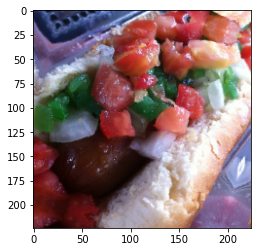

In [43]:
import matplotlib.pyplot as plt

plt.imshow(train_generator[0][0][3]);

In [44]:
# Define the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 64)      

In [45]:

cnn_hotdog = model.fit(train_generator,
                       epochs=10,
                       validation_data=valid_generator)

Epoch 1/5
16/16 [==============================] - 36s 2s/step - loss: 0.7816 - accuracy: 0.4799 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 2/5
16/16 [==============================] - 22s 1s/step - loss: 0.6754 - accuracy: 0.5884 - val_loss: 0.6861 - val_accuracy: 0.5500
Epoch 3/5
16/16 [==============================] - 25s 2s/step - loss: 0.6706 - accuracy: 0.5964 - val_loss: 0.6784 - val_accuracy: 0.5500
Epoch 4/5
16/16 [==============================] - 21s 1s/step - loss: 0.6605 - accuracy: 0.6165 - val_loss: 0.7650 - val_accuracy: 0.5040
Epoch 5/5
16/16 [==============================] - 21s 1s/step - loss: 0.6599 - accuracy: 0.6084 - val_loss: 0.6966 - val_accuracy: 0.5700


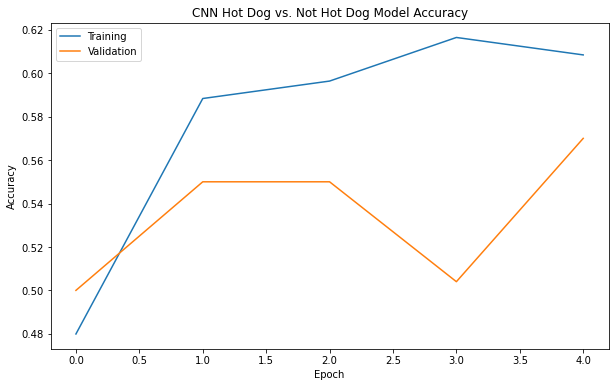

In [46]:
plt.figure(figsize=(10,6))
plt.plot(cnn_hotdog.epoch, cnn_hotdog.history['accuracy'], label='Training')
plt.plot(cnn_hotdog.epoch, cnn_hotdog.history['val_accuracy'], label='Validation')
plt.legend()
plt.title('CNN Hot Dog vs. Not Hot Dog Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy');

# Hot Dog vs. Not Hot Dog with Transfer Learning

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

<br>
<img src="https://www.topbots.com/wp-content/uploads/2019/12/cover_transfer_learning_1600px_web.jpg" style="width: 600px;">

In [47]:
from tensorflow.keras.applications.vgg19 import VGG19

# Load the pre-trained VVG19 Model
vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(224,224,3),
              pooling=None)

# Freeze all the layers in the base VGGNet19 model
for layer in vgg19.layers:
    layer.trainable = False

In [48]:
from tensorflow.keras.layers import Dropout

# Instantiate the sequential model and add the VGG19 model
model = Sequential()
for layer in vgg19.layers:
    model.add(layer)

# Add the custom layers atop the VGG19 model
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model for training
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [49]:
from tensorflow.keras.applications.vgg19 import preprocess_input

# Instantiate two image generator classes
# - Add preprocess_input function for vgg19
# - Remove scaling since that will be done in the preprocess_input function
train_datagen = ImageDataGenerator(
    data_format='channels_last',
    rotation_range=30,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
    fill_mode='reflect')

valid_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    data_format='channels_last')

# Define the train and validation generators 
train_generator = train_datagen.flow_from_directory(
    directory='./hot-dog_not-hot-dog/train',
    target_size=(224, 224),
    classes=['hot_dog','not_hot_dog'],
    class_mode='binary',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

valid_generator = valid_datagen.flow_from_directory(
    directory='./hot-dog_not-hot-dog/test',
    target_size=(224, 224),
    classes=['hot_dog','not_hot_dog'],
    class_mode='binary',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

Found 498 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


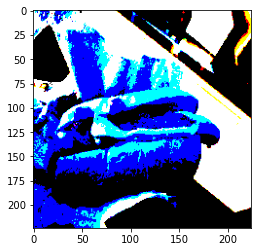

In [50]:
import matplotlib.pyplot as plt

plt.imshow(train_generator[0][0][1]);

In [51]:
vgg_hotdog = model.fit(train_generator,
                       epochs=10,
                       validation_data=valid_generator)

Epoch 1/10
16/16 [==============================] - 170s 11s/step - loss: 4.4007 - accuracy: 0.6586 - val_loss: 0.6116 - val_accuracy: 0.8240
Epoch 2/10
16/16 [==============================] - 170s 11s/step - loss: 0.4516 - accuracy: 0.8373 - val_loss: 0.4128 - val_accuracy: 0.8480
Epoch 3/10
16/16 [==============================] - 158s 10s/step - loss: 0.2305 - accuracy: 0.8916 - val_loss: 0.3859 - val_accuracy: 0.8720
Epoch 4/10
16/16 [==============================] - 179s 12s/step - loss: 0.1872 - accuracy: 0.9357 - val_loss: 0.4317 - val_accuracy: 0.8720
Epoch 5/10
16/16 [==============================] - 178s 11s/step - loss: 0.1573 - accuracy: 0.9357 - val_loss: 0.3825 - val_accuracy: 0.8780
Epoch 6/10
16/16 [==============================] - 182s 12s/step - loss: 0.1243 - accuracy: 0.9618 - val_loss: 0.4618 - val_accuracy: 0.8700
Epoch 7/10
16/16 [==============================] - 186s 12s/step - loss: 0.1529 - accuracy: 0.9458 - val_loss: 0.5015 - val_accuracy: 0.8640
Epoch 

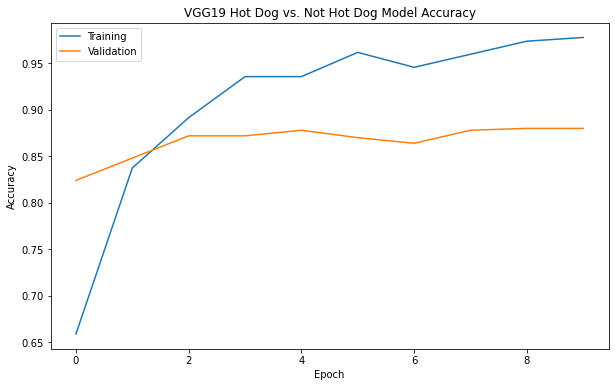

In [52]:
plt.figure(figsize=(10,6))
plt.plot(vgg_hotdog.epoch, vgg_hotdog.history['accuracy'], label='Training')
plt.plot(vgg_hotdog.epoch, vgg_hotdog.history['val_accuracy'], label='Validation')
plt.legend()
plt.title('VGG19 Hot Dog vs. Not Hot Dog Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy');

# Moment of Truth...

In [62]:
from skimage import data, io, filters
img1 = io.imread('./hotdog_1.jpg')
img2 = io.imread('./hotdog_2.jpg')
print(img1.shape, img2.shape)

(4032, 3024, 3) (4032, 3024, 3)


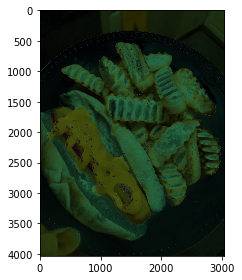

In [63]:
edges = filters.sobel(img1)
io.imshow(edges)

In [64]:
# import cv2

# img1 = cv2.imread('./hotdog_1.jpg')
# img2 = cv2.imread('./hotdog_2.jpg')
# print(img1.shape, img2.shape)

In [ ]:
from skimage.color import rgb

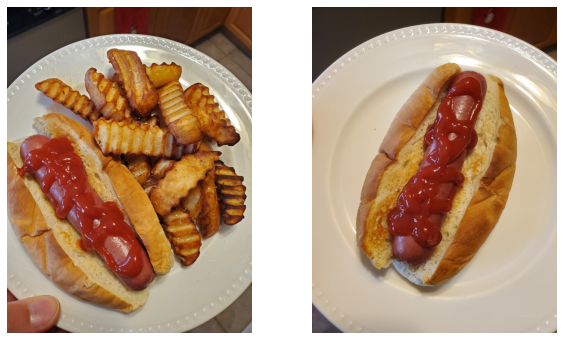

In [73]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.axis("off");

plt.subplot(1,2,2)
plt.imshow(img2)
plt.axis("off");

In [68]:
import tensorflow as tf

img1_reshaped = tf.image.resize(img1, [224, 224])
img2_reshaped = tf.image.resize(img2, [224, 224])
print(img1_reshaped.shape, img2_reshaped.shape)

(224, 224, 3) (224, 224, 3)


In [69]:
img1_final = tf.expand_dims(img1_reshaped, axis=0)
img2_final = tf.expand_dims(img2_reshaped, axis=0)
print(img1_final.shape, img2_final.shape)

(1, 224, 224, 3) (1, 224, 224, 3)


In [70]:
train_generator.class_indices

{'hot_dog': 0, 'not_hot_dog': 1}

In [74]:
model.predict(preprocess_input(img1_final), steps=1)

array([[0.00103995]], dtype=float32)

In [72]:
model.predict(preprocess_input(img2_final), steps=1)

array([[0.00052506]], dtype=float32)

# Review

- <a href="#p1">Part 1: </a>Describe convolution and pooling
    * A Convolution is a function applied to another function to produce a third function
    * Convolutional Kernels are typically 'learned' during the process of training a Convolution Neural Network
    * Pooling is a dimensionality reduction technique that uses either Max or Average of a feature map region to downsample data
- <a href="#p2">Part 2: </a>Apply a convolutional neural network to a classification task
    * Keras has layers for convolutions :) 
- <a href="#p3">Part 3: </a>Transfer Learning for Image Classification
    * Check out both pretinaed models available in Keras & TensorFlow Hub

# Sources

- *_Deep Learning_*. Goodfellow *et al.*
- *Hands-on Machine Learnign with Scikit-Learn, Keras & Tensorflow*
- [Keras CNN Tutorial](https://www.tensorflow.org/tutorials/images/cnn)
- [Tensorflow + Keras](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
- [Convolution Wiki](https://en.wikipedia.org/wiki/Convolution)
- [Keras Conv2D: Working with CNN 2D Convolutions in Keras](https://missinglink.ai/guides/keras/keras-conv2d-working-cnn-2d-convolutions-keras/)
- [Intuitively Understanding Convolutions for Deep Learning](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
- [A Beginner's Guide to Understanding Convolutional Neural Networks Part 2](https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/)

------
# References used during lecture 

[CNN Feature Engineering](https://qjjnh3a9hpo1nukrg1fwoh71-wpengine.netdna-ssl.com/wp-content/uploads/2019/07/1_ZD3ewOfpfsMAjhp4MYFnog-edited.jpg), we learned that each convolutional layer creates new features (feature maps) from the images that are passed into it. This image shows how a CNN learns edges, object parts, and then the entire object, as learned features from previous convolutional layers are passed to subsequent convolutional layers. 

[Webpage from Stanford University CNN class](https://cs231n.github.io/convolutional-networks/) with animation showing how the 3x3 convolution filters (i.e. the weight matrices) are overlapped over the Red, Yellow, and Blue channels of a color image in order to calculate convolutions and how the results are stored in an output volume. 

[Py Image Search](https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/#:~:text=increase%20when%20necessary.-,kernel_size,(7%2C%207)%20tuples.&text=%2C%20a%202%2Dtuple%20specifying%20the,of%20the%202D%20convolution%20window.), provides an in-depth exploration of each of the Conv2D parameters and how to select specific values for each parameter. 

[Keras Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/)  don't forget about the documention for the python package that we are using to build our models!